-> python model to predict a heart disease 
 - uses the cleveland dataset
 - the dataset uses 14 features
     - age in years (integer)
     - sex (1 = male and 0 = female)
     - chest pain type
         - value 1
         - value 2
         - value 3
         - value 4
     - trestbps (resting blood pressure)
     - serum cholestoral in mg/dl
     - fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
     - restecg: resting electrocardiographic results
        -- Value 0: normal
        -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
        -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
     - thalach: maximum heart rate achieved
     - exang: exercise induced angina (1 = yes; 0 = no)
     - oldpeak = ST depression induced by exercise relative to rest
     - slope: the slope of the peak exercise ST segment
        -- Value 1: upsloping
        -- Value 2: flat
        -- Value 3: downsloping
     -  ca: number of major vessels (0-3) colored by flourosopy
     -  thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
     -  num: diagnosis of heart disease (angiographic disease status)
        -- Value 0: < 50% diameter narrowing
        -- Value 1: > 50% diameter narrowing
        (in any major vessel: attributes 59 through 68 are vessels)

 -  we're using random forest trees to construct the model
 -  flowchart of the model
     -  EDA (faeture analysis)
     -  check for missing data
     -  impute the missing data
     -  split the features into numeric and categorical
     -  






In [ ]:
!pip3 install -U ucimlrepo 

In [7]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Function to train the Random Forest model and return the trained pipeline
# Function to train the model 
# Function returns the trained pipeline
# The function is called heart_disease model for now 
def heart_disease_model(data_path):
    # loading the dataset 
    # inputted the datset later when function is called 
    data = pd.read_csv(data_path)

    # check if the datset has any missing values
    if data.isnull().sum().any():
        print("Warning: Missing values detected in the dataset.")

    # our target variable that we train our data on is 'target'(in the csv file)
    X = data.drop(columns=['target'])  
    y = data['target'] 

    # Define which columns are numerical and categorical
    # beacause we have 7 categorical and 6 numerical
    numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']
    categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

    # Preprocessing for numerical data
    # imputing value which are missing 
    numerical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        # standardizing numeric features
        ('scaler', StandardScaler())  
    ])

    # Preprocessing for categorical data:
    categorical_transformer = Pipeline(steps=[
        # imputing missing values 
        ('imputer', SimpleImputer(strategy='most_frequent')),  
        # used one-hot encoding here to encode the missing values
        ('onehot', OneHotEncoder(handle_unknown='ignore'))  
    ])

    # a complete ml model consists of a preprocessor and a classifier

    # Combines both the numerical and categorical transformers into a single preprocessor.
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_features),
            ('cat', categorical_transformer, categorical_features)
        ])

    # Create a RandomForest pipeline with preprocessing and the classifier
    rf_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))  # 100 trees in the forest
    ])

    # Return the model pipeline and the data for evaluation
    return rf_pipeline, X, y

In [8]:
# i separated the training and evaualtion 
# this cell uses the evaluation metrics mentioned by the professor
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve, roc_auc_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

def evaluate_model(model, X, y, cv=5):
    # Fit the pipeline to the data
    # Explicitly fit the model on the entire data
    model.fit(X, y)  

    # Get predictions for each fold using cross_val_predict
    y_pred = cross_val_predict(model, X, y, cv=cv)

    # Compute the confusion matrix
    cm = confusion_matrix(y, y_pred)

    # Extract TN, FP, FN, and TP from the confusion matrix
    tn, fp, fn, tp = cm.ravel()

    # Calculate additional metrics
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    specificity = tn / (tn + fp)
    roc_auc = roc_auc_score(y, y_pred)

    # Print all the evaluation metrics
    print(f"Precision: {precision:.2f}")
    print(f"Recall (Sensitivity): {recall:.2f}")
    print(f"Specificity: {specificity:.2f}")
    print(f"F1-Score: {f1:.2f}")
    print(f"Accuracy: {(tp + tn) / (tp + tn + fp + fn):.2f}")

    # Generate and display the Confusion Matrix
    ConfusionMatrixDisplay.from_predictions(y, y_pred, display_labels=["No Disease", "Disease"], cmap="Blues")
    plt.title("Confusion Matrix")
    plt.show()

    # Plot the ROC curve
    fpr, tpr, thresholds = roc_curve(y, model.predict_proba(X)[:, 1])
    plt.figure()
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
    plt.xlabel("False Positive Rate (1 - Specificity)")
    plt.ylabel("True Positive Rate (Recall)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend(loc="best")
    plt.show()


Precision: 0.83
Recall (Sensitivity): 0.81
Specificity: 0.86
F1-Score: 0.82
Accuracy: 0.83


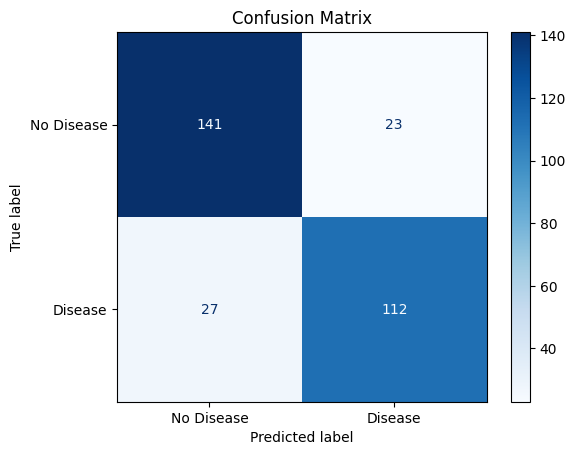

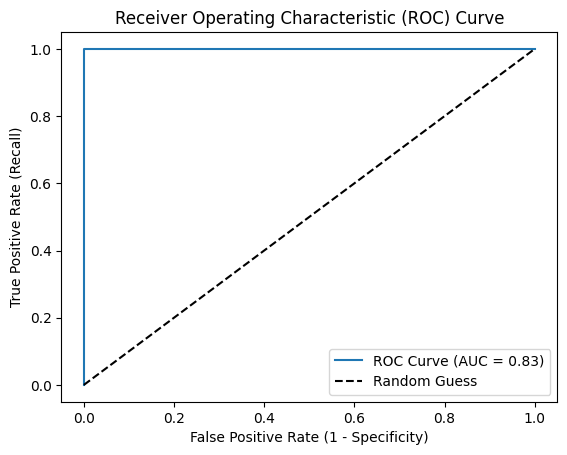

In [9]:
# Train the model on the dataset
model, X_test, y_test = heart_disease_model('heart_disease.csv')

# Evaluate the model performance
evaluate_model(model, X_test, y_test)

In [5]:
import pandas as pd
import numpy as np

# Assuming your model is already trained and the pipeline is fitted
def predict_input(model):
    # Get user input for each feature
    input_data = {}
    input_data['age'] = int(input("Enter age: "))
    input_data['sex'] = int(input("Enter sex (1 = male, 0 = female): "))
    input_data['trestbps'] = int(input("Enter resting blood pressure(trestbps): "))
    input_data['chol'] = int(input("Enter serum cholesterol (in mg/dl)(chol): "))
    input_data['thalach'] = int(input("Enter maximum heart rate achieved(thalach): "))
    input_data['oldpeak'] = float(input("Enter depression induced by exercise relative to rest(oldpeak): "))
    input_data['ca'] = int(input("Enter number of major vessels colored by fluoroscopy(ca): "))
    input_data['cp'] = int(input("Enter chest pain type (1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic):(cp) "))
    input_data['fbs'] = int(input("Enter fasting blood sugar > 120 mg/dl (1 = true, 0 = false): (fbs)"))
    input_data['restecg'] = int(input("Enter resting electrocardiographic results (0 = normal, 1 = ST-T wave abnormality, 2 = left ventricular hypertrophy)(restecg): "))
    input_data['exang'] = int(input("Enter exercise induced angina (1 = yes, 0 = no)(exang): "))
    input_data['slope'] = int(input("Enter slope of the peak exercise ST segment (1 = upsloping, 2 = flat, 3 = downsloping)(slope): "))
    input_data['thal'] = int(input("Enter thalassemia (3 = normal, 6 = fixed defect, 7 = reversible defect)(thal): "))

    # Convert the input data to a DataFrame for compatibility with the model
    input_df = pd.DataFrame([input_data])

    # Make prediction
    prediction = model.predict(input_df)
    
    # Show the prediction result
    if prediction == 1:
        print("Prediction: The patient is likely to have heart disease.")
    else:
        print("Prediction: The patient is unlikely to have heart disease.")
    
# Call this function and pass the trained model
predict_input(model)


Enter age:  67
Enter sex (1 = male, 0 = female):  1
Enter resting blood pressure(trestbps):  160
Enter serum cholesterol (in mg/dl)(chol):  286
Enter maximum heart rate achieved(thalach):  108
Enter depression induced by exercise relative to rest(oldpeak):  1.5
Enter number of major vessels colored by fluoroscopy(ca):  3
Enter chest pain type (1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic):(cp)  4
Enter fasting blood sugar > 120 mg/dl (1 = true, 0 = false): (fbs) 0
Enter resting electrocardiographic results (0 = normal, 1 = ST-T wave abnormality, 2 = left ventricular hypertrophy)(restecg):  2
Enter exercise induced angina (1 = yes, 0 = no)(exang):  1
Enter slope of the peak exercise ST segment (1 = upsloping, 2 = flat, 3 = downsloping)(slope):  2
Enter thalassemia (3 = normal, 6 = fixed defect, 7 = reversible defect)(thal):  3


Prediction: The patient is likely to have heart disease.
